In [13]:
import numpy as np 
import os
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [14]:
def AddImage(path):
  test_img = Image.open(path)

  test_img = test_img.resize((5,5))
  test_img = test_img.convert('L')
  '''plt.imshow(test_img, cmap = 'gray')
  plt.show()'''

  test_x = np.array(test_img, np.float32)
  test_x = test_x.reshape(-1,25)
  test_x = test_x / 255
  return test_x[0]

In [15]:
def AddGludSmiles(x, y,folderPath):
  for filename in os.listdir(folderPath):
    x.append(AddImage(os.path.join(folderPath, filename)))
    y.append(1)

def AddUglySmiles(x, y,folderPath):
  for filename in os.listdir(folderPath):
    x.append(AddImage(os.path.join(folderPath, filename)))
    y.append(0)

In [16]:
x = []
y = []
AddUglySmiles(x,y,'GludSmiles')
AddGludSmiles(x,y,'UglySmiles')
x = np.array(x)
y = np.array(y)

In [17]:
def metric(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

class KNN:
  def __init__(self, k, x, y) -> None:
      self.K = k
      self.X = x
      self.Y = y
      
  def predict(self, x):
    pred = []
    for i in x:
      dists = np.array([metric(i, x_t) for x_t in self.X]) 
      dists_sort = dists.argsort()[:self.K]
      neigh = {}

      for j in dists_sort:
        target = self.Y[j]
        if target in neigh:
          neigh[target] +=1
        else:
          neigh[target] = 1
    
      pred.append(max(neigh, key = neigh.get))
    return pred
  

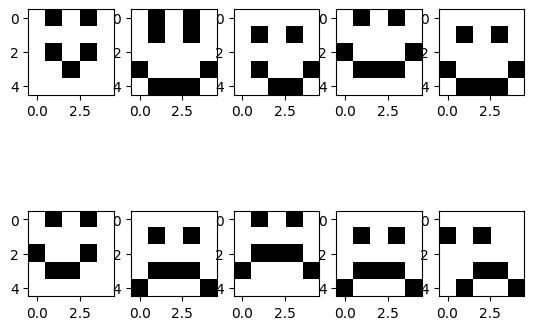

In [18]:
for i in range(10):
  plt.subplot(2,5, i+1)
  plt.imshow(x[i].reshape(5,5), cmap = "gray")
plt.show()

In [19]:

kVals = [1, 3, 5, 7]
for k in kVals:
  knn = KNN(k, x, y)
  pred = knn.predict(x)
  print("k =",k ,'accuracity =', accuracy_score(y, pred))

k = 1 accuracity = 1.0
k = 3 accuracity = 0.9090909090909091
k = 5 accuracity = 0.9090909090909091
k = 7 accuracity = 0.7272727272727273


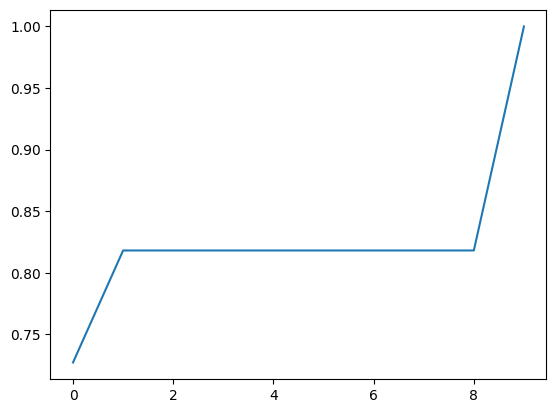

In [20]:
def Hebba(weight, w0, x0, y, e):
    #Обучает вес по правилу хебба
    alpha = 0.4
    w0 += (e - y)
    return weight - alpha * x0 * (e - y)

def f_sum(w,w0, x0):
    sum = np.dot(x0, w) + w0
    return sum

def f_act(sum, T):
    return 1 if sum > T else 0

def predict(w, w0, x, T = 0):
    y = []
    for i in x:
        y.append(f_act(f_sum(W,W0, i), T))
    return y

W = np.random.random(x.shape[1])
W0 = 0
epochs = 0
acc = []
E = 0
T = 0
while E != len(x) and epochs < 10000:
    isAlrigth = True
    for i in range(len(x)):
        y_pred = f_act(f_sum(W,W0, x[i]), T)
        if(y_pred == y[i]):
            E +=1
        else:
            W = Hebba(W, W0, x[i], y[i], y_pred)
            isAlrigth = False
    acc.append(E/len(x))
    epochs += 1
    if not isAlrigth:
        E = 0

plt.plot(np.arange(epochs), acc)


In [21]:
y_pred = np.array(predict(W, W0, x, 0))
print('pred\t',y_pred)
print('target\t',y)

pred	 [0 0 0 0 0 0 1 1 1 1 1]
target	 [0 0 0 0 0 0 1 1 1 1 1]
